In [1]:
import os
import torch
import torchvision

import torchvision.transforms as transforms
import numpy as np
import matplotlib.pylab as plt

from utils import compute_confusion_matrix, train, evaluate
from networks import FullyConnectedNN

# Define hyperparameters etc.

In [2]:
datadir = '../datasets'
batch_size = 32
learning_rate = 0.001
num_epochs = 1
indim = 784
outdim = 10
hdim = 100
num_hidden = 2
print_every = 100

# Dataset

In [3]:
# define transform to map data from a PIL.Image data type
# to a Tensor which is what pytorch uses
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(0.5, 0.5)])

# (down)load training and testing datasets
emnist_traindata = torchvision.datasets.EMNIST(datadir, split='mnist', download=True, transform=transform)
emnist_testdata = torchvision.datasets.EMNIST(datadir, split='mnist', train=False, download=True, transform=transform)

train_num_examples, _, _ = emnist_traindata.data.shape
test_num_examples, _, _ = emnist_testdata.data.shape

print('Training dataset has {train_num_examples}, test dataset has {test_num_examples}'.format(train_num_examples=train_num_examples, test_num_examples=test_num_examples))

Training dataset has 60000, test dataset has 10000


# Fully-connected neural network

In [4]:
fcnet = FullyConnectedNN(indim, outdim, hdim, num_hidden)

In [5]:
params = fcnet.parameters()
num_params = np.sum([np.prod(p.shape) for p in params])
print('The number of parameters in the network is: {}'.format(num_params))

The number of parameters in the network is: 89610


In [6]:
loss_fcn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(fcnet.parameters(), lr=learning_rate)

In [7]:
# create dataloader
trainloader = torch.utils.data.DataLoader(emnist_traindata, batch_size=batch_size, shuffle=True, drop_last=True)
testloader = torch.utils.data.DataLoader(emnist_testdata, batch_size=batch_size, shuffle=True, drop_last=True)

In [8]:
# make weights trainable
fcnet.train()

# run training loop
training_loss = train(num_epochs, print_every, trainloader, loss_fcn, optimizer, fcnet)

Epoch: 0, Iteration: 0, Loss: 2.31, Acc: 0.09
Epoch: 0, Iteration: 100, Loss: 0.20, Acc: 1.00
Epoch: 0, Iteration: 200, Loss: 0.33, Acc: 0.94
Epoch: 0, Iteration: 300, Loss: 0.16, Acc: 0.97
Epoch: 0, Iteration: 400, Loss: 0.30, Acc: 0.84
Epoch: 0, Iteration: 500, Loss: 0.15, Acc: 0.97
Epoch: 0, Iteration: 600, Loss: 0.40, Acc: 0.88
Epoch: 0, Iteration: 700, Loss: 0.13, Acc: 0.94
Epoch: 0, Iteration: 800, Loss: 0.21, Acc: 0.94
Epoch: 0, Iteration: 900, Loss: 0.27, Acc: 0.88
Epoch: 0, Iteration: 1000, Loss: 0.41, Acc: 0.94
Epoch: 0, Iteration: 1100, Loss: 0.06, Acc: 1.00
Epoch: 0, Iteration: 1200, Loss: 0.26, Acc: 0.91
Epoch: 0, Iteration: 1300, Loss: 0.09, Acc: 0.97
Epoch: 0, Iteration: 1400, Loss: 0.15, Acc: 0.97
Epoch: 0, Iteration: 1500, Loss: 0.08, Acc: 1.00
Epoch: 0, Iteration: 1600, Loss: 0.10, Acc: 0.97
Epoch: 0, Iteration: 1700, Loss: 0.20, Acc: 0.94
Epoch: 0, Iteration: 1800, Loss: 0.21, Acc: 0.94


Text(0, 0.5, 'Cross Entropy Loss')

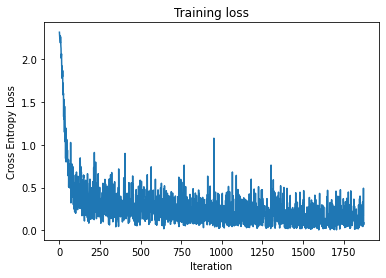

In [9]:
# plot training loss
plt.plot(training_loss)
plt.title('Training loss')
plt.xlabel('Iteration')
plt.ylabel('Cross Entropy Loss')

In [10]:
# make weights not trainable
fcnet.eval()

average_accuracy, average_loss, prediction_label_data = evaluate(testloader, loss_fcn, fcnet)
    
print('Avg Loss: {loss:.2f}, Avg Acc: {acc:.2f}'.format(loss=average_loss, acc=average_accuracy))

Avg Loss: 0.13, Avg Acc: 0.96


Text(0.5, 1.0, 'Label: 5, Prediction 8')

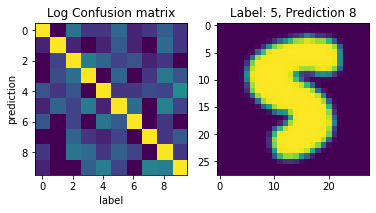

In [11]:
confusion_matrix, mistakes = compute_confusion_matrix(prediction_label_data)
# get image with wrong prediction
mistake_idx = np.random.randint(len(mistakes))
mistake_pred, mistake_label, mistake_data = mistakes[mistake_idx]
mistake_img = mistake_data.squeeze().T

plt.subplot(121)
plt.imshow(np.log(confusion_matrix))
plt.title('Log Confusion matrix')
plt.xlabel('label')
plt.ylabel('prediction')

plt.subplot(122)
plt.imshow(mistake_img)
plt.title('Label: {label}, Prediction {pred}'.format(label=mistake_label, pred=mistake_pred))